# MNIST 이란
MNIST 데이터셋은 이미지 처리 및 머신 러닝 모델을 훈련하고 테스트하는데 사용되는 데이터셋이다. MNIST 데이터셋은 손으로 쓴 숫자들로 데이터 세트에는 28x28 크기, 60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지가 있다. 숫자는 채널이 하나인 회색조 이미지이며 라벨은 이미지의 숫자를 나타내는 0에서 9까지 이다.

## MNIST 다운로드 하기
먼저 필요한 라이브러리를 가져오자.

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

PyTorch의 dataset.MNIST함수를 사용해서 MNIST 데이터셋을 다운로드하고 메모리에 로드

In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)


100.0%
100.0%
100.0%
100.0%


dataset.MNIST함수의 파라미터 설정을 간단히 살펴보자.

 

root(string):

MNIST/raw/train-images-idx3-ubyte와 MNIST/raw/t10k-images-idx3-ubyte가 있는 디렉토리를 가리킨다.

 

train(bool, optional):

이 값이True이면 60,000개의 이미자와 라벨이 포함된 MNIST 트레이닝 데이터셋을 다운로드하거나 반환한다. False이면 10,000개의 이미지와 라벨이 포함된 테스트 데이터셋을 다운로드하거나 반환한다. 보통 트레이닝 데이터셋은 머신 러닝 모델을 훈련하는데 사용하고 테스트 데이터셋은 훈련된 모델의 성능을 평가하는데 사용한다.

 

download(bool, optional):

이 값이 True이면 데이터 셋을 다운로드하고 root에서 설정한 디렉토리에 저장한다. 이미 데이터셋이 있으면 다운로드가 되지 않는다.

 

transform(callable, optional):

이미지 데이터에 적용할 변환을 지정한다. 예를 들어 normalization transformation을 하려면 아래 코드를 사용할 수 있다.

In [3]:
# Define transform
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
 
# Load training set of MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


먼저 transforms.Compose는 두 가지 변환 transforms.ToTensor()및 transforms.Normalize()을 정의한다.

ToTensor()은 이미지 데이터를 PyTorch 텐서로 변환하고 Normalize()은 텐서 값을 평균 0.5와 표준 편차 0.5로 표준화한다.

그런 다음 이 transform를 함수에 전달하여 datasets.MNIST()로드할 때, 설정한 변환을 데이터셋에 적용한다.

이렇게 하면 각 이미지의 픽셀 값들이 컴퓨터가 연산하기 쉬운 범위로 변환되어 모델의 성능과 정확도가 향상될 수 있다.

이런 과정은 데이터 전처리(Data preprocessing)의 일부로 높은 성능을 위해 훈련 전에 데이터셋을 가공하는 중요한 작업 중 하나이다.

 

이제 코드를 실행하면 MNIST 데이터셋이 설정한 root디렉토리에 다운로드 된다.



## MNIST 열어보기
이제 다운로드한 MNIST 데이터셋을 확인해보자.

위에서 정의한 train_dataset와 test_dataset은 iterable한 객체로 하나씩 불러올 수 있다.

In [4]:
image, label = train_dataset[0]

In [6]:
image.shape

torch.Size([1, 28, 28])

In [7]:
label

5

이미지의 사이즈를 출력해보면 (1, 28, 28)으로 1채널의 28x28 크기의 이미지임을 확인할 수 있고, label은 이 이미지의 숫자를 가리킨다.

주피터 랩에서 간단한 코드로 이미지를 직접 출력해보자.

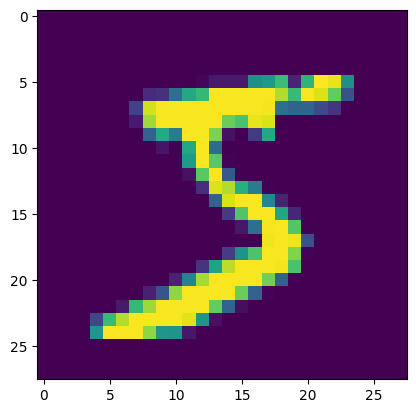

In [8]:
import matplotlib.pyplot as plt
 
plt.imshow(image[0]) # image의 size가 (1, 28, 28)이므로 (28, 28)으로 변환하여 이미지를 출력한다.
 
# or 
 
plt.imshow(image.squeeze()) # squeeze는 size에서 1인 차원을 없앤다.

MNIST 외에도 CIFAR-10 및 CIFAR-100, ImageNet, COCO(Common Objects in Context), LFW(Labeled Faces in the Wild) 등 엄청나게 다양한 데이터셋이 있다.

이러한 데이터셋은 이미지 분류(image classification), 물체 감지(한글로 정확한 말인지는 모르겠는데 아무튼 object detection), 얼굴 인식(face recognition), 세분화(segmentation) 등 다양한 머신 러닝 학습에 사용된다.